# Importing All The Important Library

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

In [63]:
# Load The Data from CSV to pandas format
data = pd.read_csv('/home/pankaj/Documents/code/Fertilizers/FertilizersProduct.csv',encoding='ISO-8859-1')

In [64]:
#Visualising The Last 5 Row of Data
data.tail()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
164463,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2004,2004,tonnes,5.00,Fb
164464,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2008,2008,tonnes,2.13,Fb
164465,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2009,2009,tonnes,9.00,Fb
164466,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2010,2010,tonnes,4971.00,Fb
164467,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2011,2011,tonnes,7.00,Fb


In [65]:
# Counting All the Country In dataset
data["Area"].nunique()

171

## Seprating the india's data

In [66]:
#country = input('Enter the country name of which u wanna see the usages: ')

In [67]:
country = 'India'

In [68]:
Country_data = data.loc[data.Area == 'India'] #seprate the data 
data = data.loc[data.Area != 'India']

In [69]:
Country_data.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
65372,100,India,4007,"Ammonia, anhydrous",5610,Import Quantity,2002,2002,tonnes,1279348.13,Qm
65373,100,India,4007,"Ammonia, anhydrous",5610,Import Quantity,2003,2003,tonnes,979985.94,Qm
65374,100,India,4007,"Ammonia, anhydrous",5610,Import Quantity,2004,2004,tonnes,1189895.82,Qm
65375,100,India,4007,"Ammonia, anhydrous",5610,Import Quantity,2005,2005,tonnes,1731417.05,Qm
65376,100,India,4007,"Ammonia, anhydrous",5610,Import Quantity,2006,2006,tonnes,1781431.57,Qm


In [70]:
# Drop irrelevant columns
Country_data.drop(['Area Code','Item Code', 'Element Code', 'Year Code', 'Flag'],inplace=True,axis=1)

In [71]:
Country_data.head() # visualisisng the first five row

,Area,Item,Element,Year,Unit,Value
65372,India,"Ammonia, anhydrous",Import Quantity,2002,tonnes,1279348.13
65373,India,"Ammonia, anhydrous",Import Quantity,2003,tonnes,979985.94
65374,India,"Ammonia, anhydrous",Import Quantity,2004,tonnes,1189895.82
65375,India,"Ammonia, anhydrous",Import Quantity,2005,tonnes,1731417.05
65376,India,"Ammonia, anhydrous",Import Quantity,2006,tonnes,1781431.57


In [72]:
Country_data.Element.value_counts()

Export Value        318
Export Quantity     318
Import Quantity     302
Import Value        302
Agricultural Use    162
Production          112
Name: Element, dtype: int64

**Total Item In That Country**

In [73]:
Country_data.Item.value_counts()

Urea                                                                        96
Ammonium sulphate                                                           94
Diammonium phosphate (DAP)                                                  92
NPK fertilizers                                                             86
Phosphate rock                                                              85
Potassium sulphate (sulphate of potash) (SOP)                               83
Potassium chloride (muriate of potash) (MOP)                                81
Other NP compounds                                                          81
Monoammonium phosphate (MAP)                                                73
Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate    69
Other potassic fertilizers, n.e.c.                                          64
Sodium nitrate                                                              64
Ammonia, anhydrous                                  

**Total Item in World label**

In [74]:
data.Item.value_counts()

Urea                                                                        10395
NPK fertilizers                                                             10059
Ammonium sulphate                                                            8960
Other nitrogenous fertilizers, n.e.c.                                        8886
Potassium chloride (muriate of potash) (MOP)                                 8770
Fertilizers n.e.c.                                                           8722
Ammonium nitrate (AN)                                                        8674
Other NP compounds                                                           8419
Diammonium phosphate (DAP)                                                   7715
Potassium sulphate (sulphate of potash) (SOP)                                7655
Potassium nitrate                                                            7524
Ammonia, anhydrous                                                           7448
Monoammonium pho

**Total unique Item produced by World**

In [75]:
data.Item.nunique()

23

**Total unique Item Produced by India**

In [76]:
Country_data.Item.nunique()

22

In [77]:
country

'India'

## Agricultural Use Of Fertilizers in India

In [78]:
agr_usage = Country_data.loc[Country_data.Element == 'Agricultural Use']
agr_usage.sort_values(by=['Value'], ascending=False).head()

,Area,Item,Element,Year,Unit,Value
66857,India,Urea,Agricultural Use,2015,tonnes,30634870.0
65591,India,Ammonium sulphate,Agricultural Use,2015,tonnes,30634800.0
66856,India,Urea,Agricultural Use,2014,tonnes,30610000.0
66855,India,Urea,Agricultural Use,2013,tonnes,30600480.0
66854,India,Urea,Agricultural Use,2012,tonnes,30002200.0


<IPython.core.display.Javascript object>


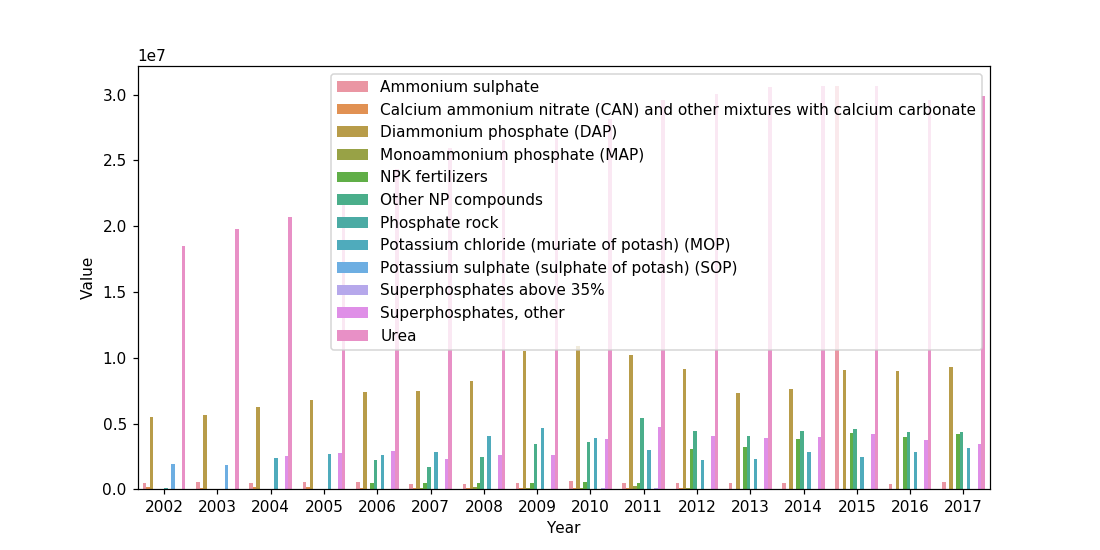

In [79]:
plt.figure(figsize=(10,5))
sns.barplot(x='Year',
    y='Value',
    hue='Item',
    data=agr_usage
)
plt.legend(loc = '2004')

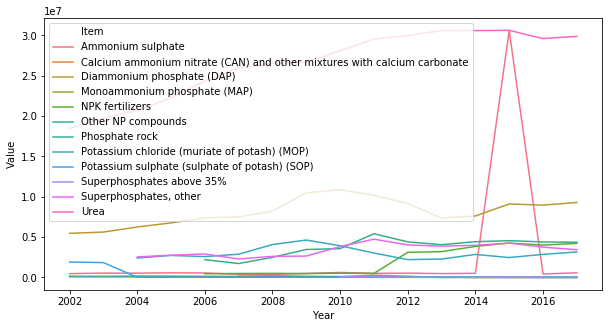

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(x= 'Year',y = 'Value',hue = 'Item',data=agr_usage)
plt.show()

In [80]:
print(country)

India


## Total Agricultural Use in 2017 of whole world

In [81]:
usage_global = data.loc[(data.Element == 'Agricultural Use')  & (data.Year == 2017)]
countries = data.Area.unique()
cdf = []
adf = []
for c in countries:
    df_aux = usage_global.loc[usage_global.Area == c]
    amount = df_aux.Value.sum()
    cdf.append(c)
    adf.append(amount)
df_fert = pd.DataFrame({'Country': cdf, 'Amount': adf})
df_fert = df_fert.sort_values(by=['Amount'], ascending=False)

<IPython.core.display.Javascript object>


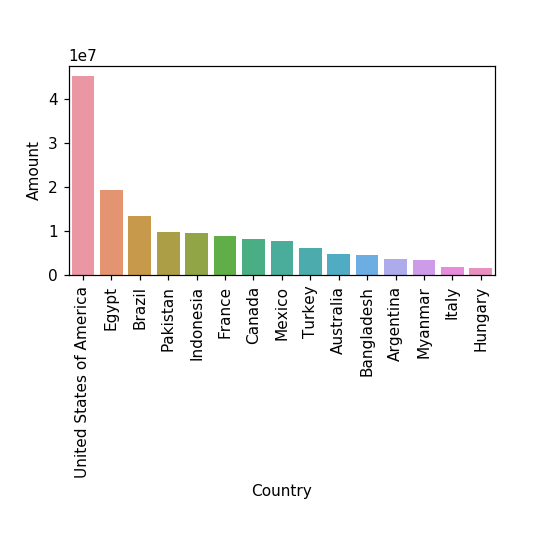

In [82]:
plt.figure(figsize=(5,5))
sns.barplot(data= df_fert.iloc[:15,:],x = "Country",y = 'Amount')
ax = plt.gca().xaxis

for items in ax.get_ticklabels():
    items.set_rotation(90)

plt.subplots_adjust(bottom = 0.5)

# Production And Export in India

In [83]:
fert_prod = Country_data.loc[Country_data.Element == 'Production']
fert_prod.sort_values(by=['Value'], ascending=False).head()

,Area,Item,Element,Year,Unit,Value
66777,India,Urea,Production,2015,tonnes,24461300.0
66778,India,Urea,Production,2016,tonnes,24200800.0
66775,India,Urea,Production,2013,tonnes,22718700.0
66776,India,Urea,Production,2014,tonnes,22592900.0
66774,India,Urea,Production,2012,tonnes,22586600.0


In [84]:
len(fert_prod)
print(country)

India


<IPython.core.display.Javascript object>


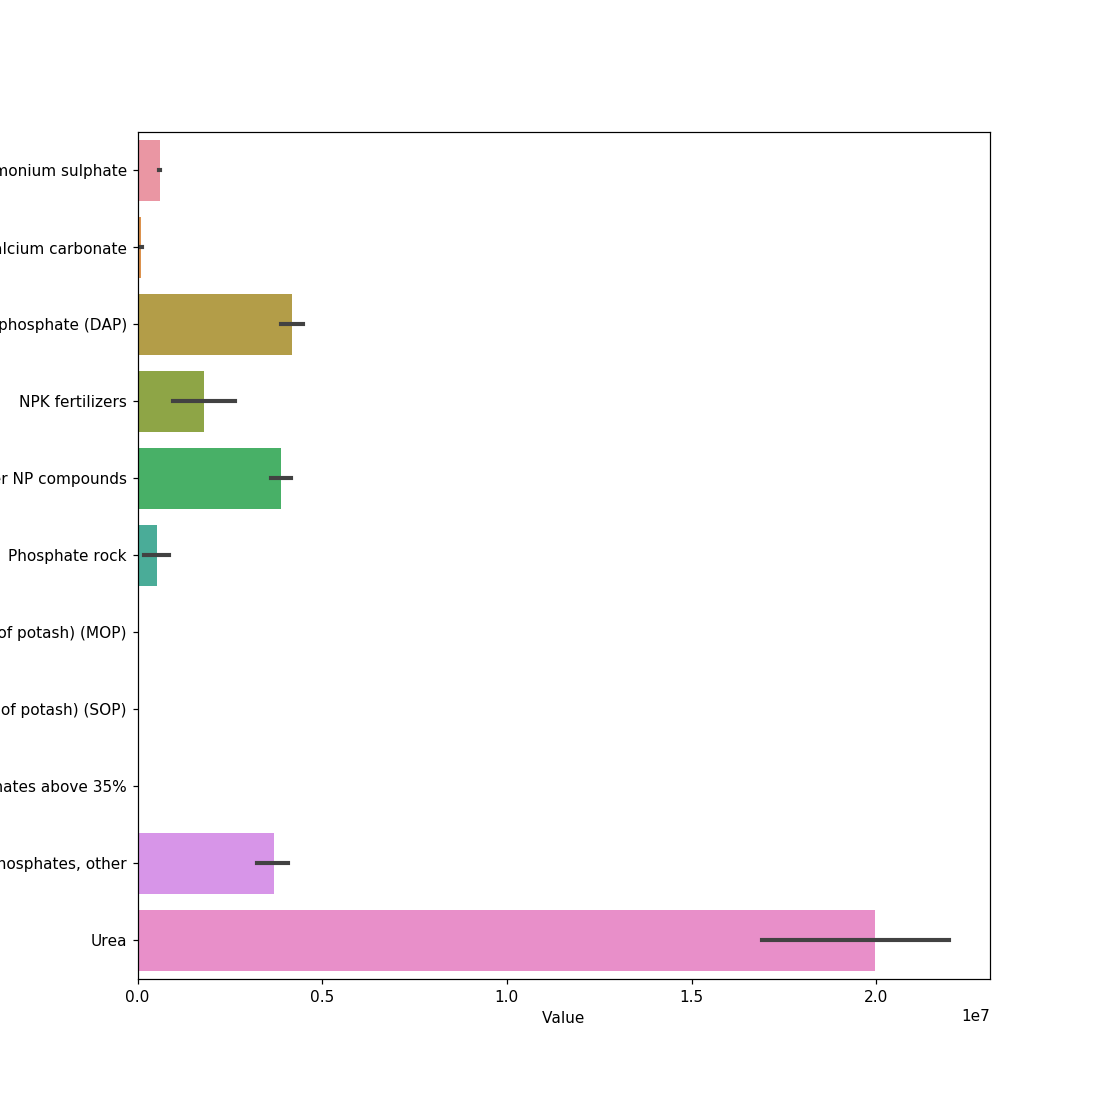

In [85]:
if len(fert_prod)!= 0:
    plt.figure(figsize=(10,10))
    sns.barplot(data= fert_prod.iloc[:,:10],y = "Item",x = 'Value')
    plt.show()

In [86]:
fert_expo = Country_data.loc[Country_data.Element == 'Export Quantity']
fert_expo.sort_values(by=['Value'], ascending=False).head()

,Area,Item,Element,Year,Unit,Value
65942,India,NPK fertilizers,Export Quantity,2009,tonnes,107013.03
65948,India,NPK fertilizers,Export Quantity,2015,tonnes,103093.61
65857,India,Monoammonium phosphate (MAP),Export Quantity,2009,tonnes,90087.85
65947,India,NPK fertilizers,Export Quantity,2014,tonnes,79044.01
65950,India,NPK fertilizers,Export Quantity,2017,tonnes,77989.31


<IPython.core.display.Javascript object>


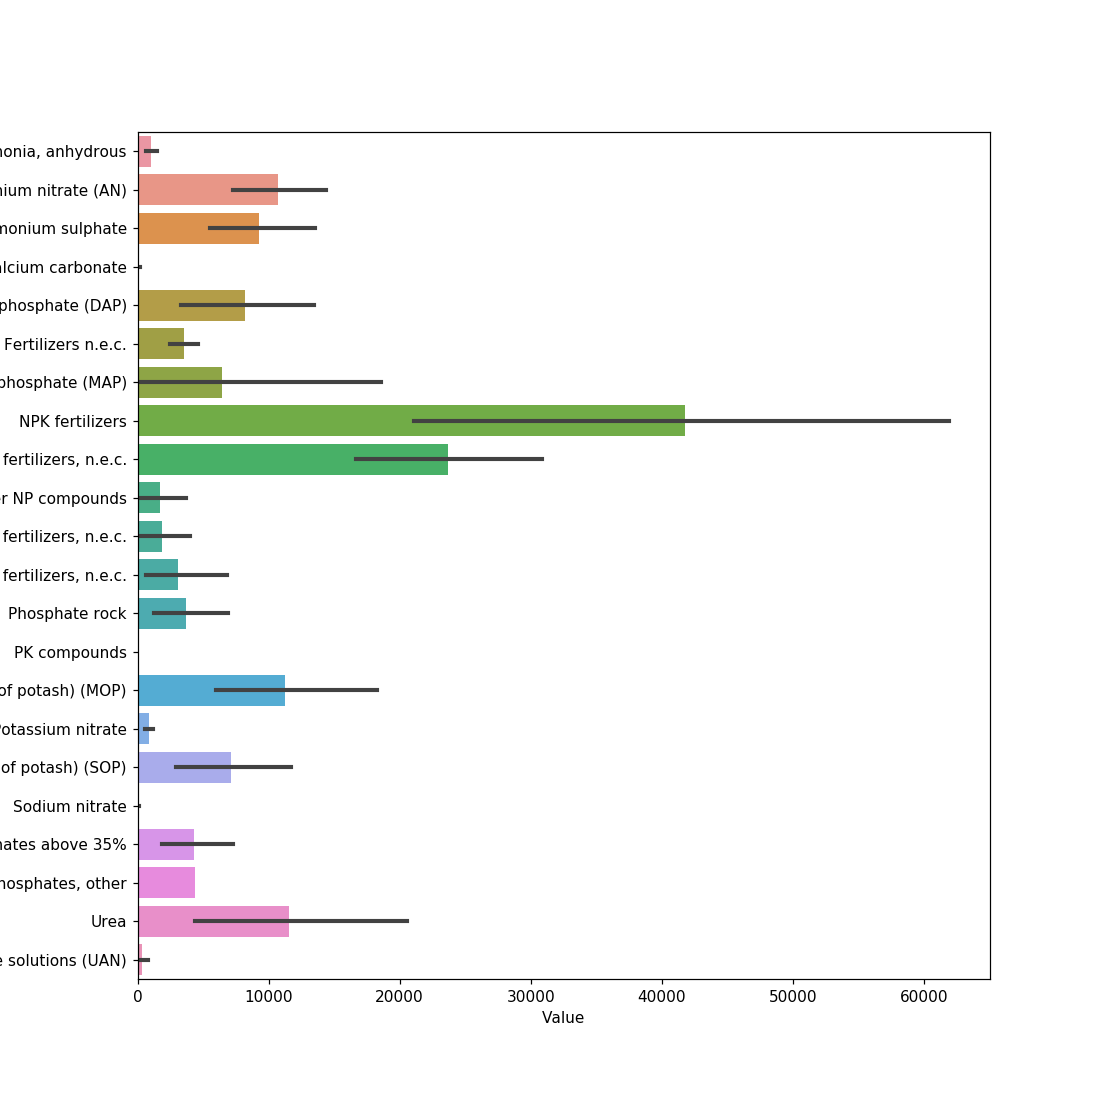

In [87]:
plt.figure(figsize=(10,10))
sns.barplot(data= fert_expo.iloc[:,:10],y = "Item",x = 'Value')
plt.show()

<IPython.core.display.Javascript object>


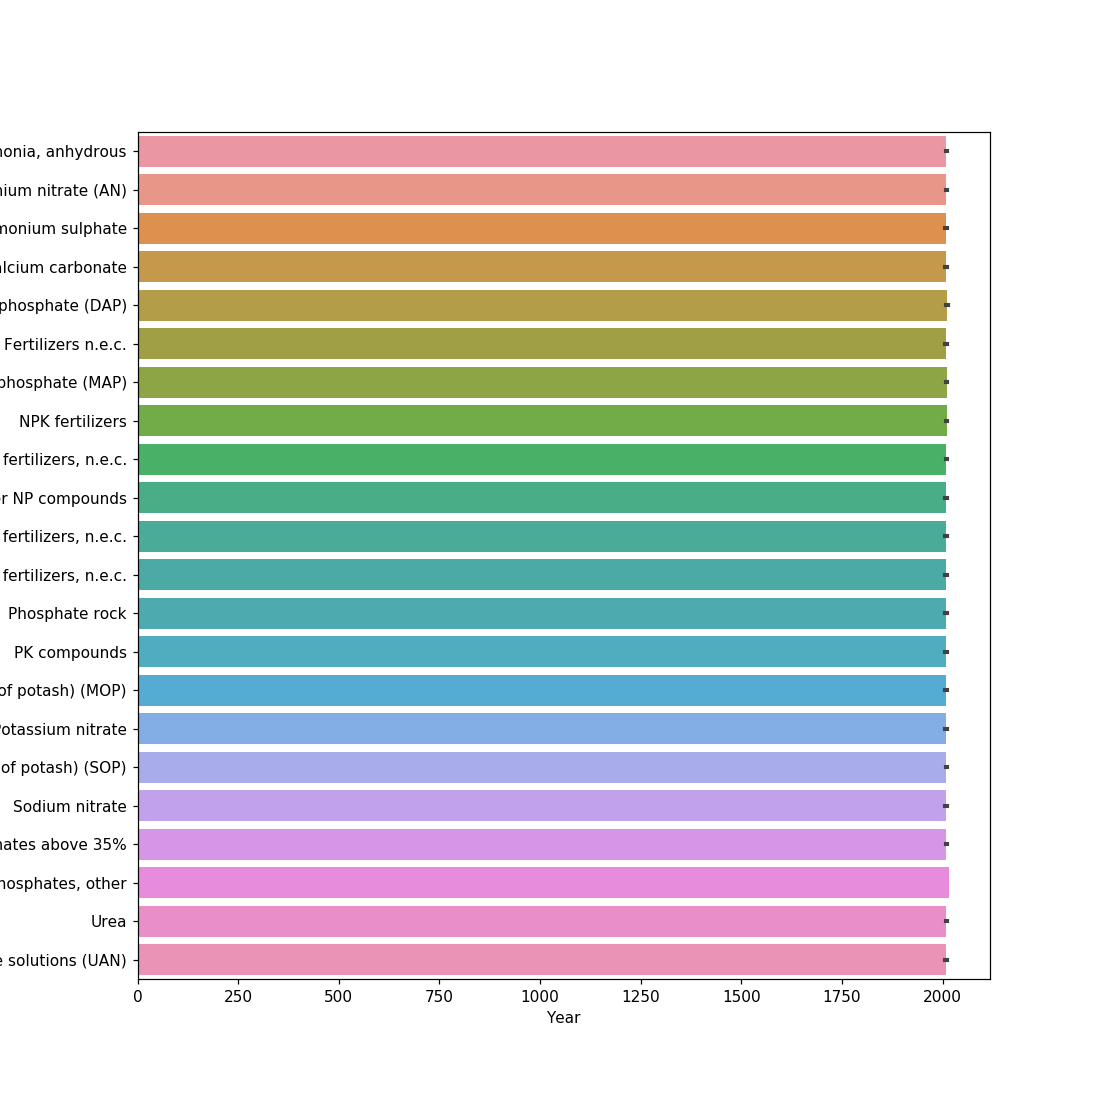

In [88]:
plt.figure(figsize=(10,10))
sns.barplot(data= fert_expo,y = "Item",x = 'Year')
plt.show()

In [89]:
urea_export = Country_data.loc[(Country_data.Item == 'Urea') & (Country_data.Element == 'Export Value')]
urea_export.head()

,Area,Item,Element,Year,Unit,Value
66828,India,Urea,Export Value,2002,1000 US$,36.88
66829,India,Urea,Export Value,2003,1000 US$,1413.85
66830,India,Urea,Export Value,2004,1000 US$,659.49
66831,India,Urea,Export Value,2005,1000 US$,1231.78
66832,India,Urea,Export Value,2006,1000 US$,174.82


<IPython.core.display.Javascript object>


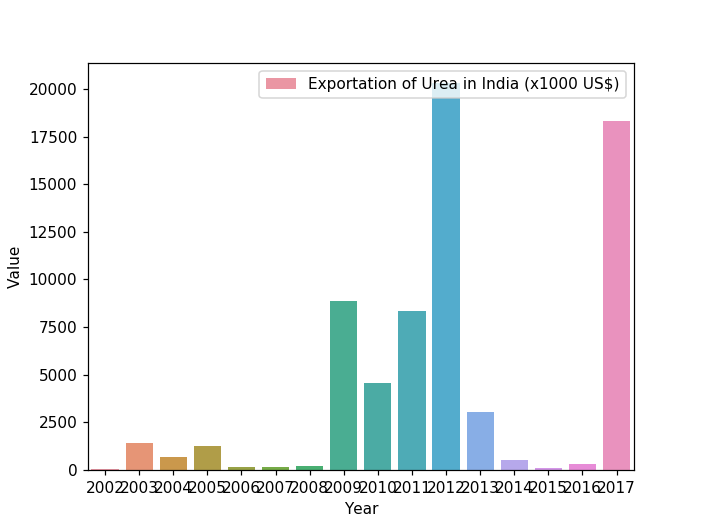

In [122]:
plt.figure()
sns.barplot(data = urea_export, x="Year", y="Value", label=f'Exportation of Urea in {country} (x1000 US$)')
plt.legend()
plt.show()


In [91]:
import math

millnames = ['',' Thousand',' Million',' Billion',' Trillion']

def millify(n):
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))

    return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

In [92]:
country

'India'

In [93]:
total = urea_export['Value'].sum()
print (f'{country} exported US$ {millify(total*1000)} of Urea')

India exported US$ 68 Million of Urea


## Total Export in India of Fertilizers

In [94]:
total_export = Country_data.loc[(Country_data.Element == 'Export Value')]
total_export.head()

,Area,Item,Element,Year,Unit,Value
65420,India,"Ammonia, anhydrous",Export Value,2002,1000 US$,107.86
65421,India,"Ammonia, anhydrous",Export Value,2003,1000 US$,74.04
65422,India,"Ammonia, anhydrous",Export Value,2004,1000 US$,178.43
65423,India,"Ammonia, anhydrous",Export Value,2005,1000 US$,135.71
65424,India,"Ammonia, anhydrous",Export Value,2006,1000 US$,160.05


In [95]:
india_export = total_export['Value'].sum()
#total = {millify(total*1000)}
print (f'{country} exported US$ {millify(india_export*1000)} of total fertilizers')

India exported US$ 975 Million of total fertilizers


## Total Import In india of Fertilizers

In [96]:
total_import = Country_data.loc[(Country_data.Element == 'Import Value')]
total_import.head()

,Area,Item,Element,Year,Unit,Value
65388,India,"Ammonia, anhydrous",Import Value,2002,1000 US$,181517.77
65389,India,"Ammonia, anhydrous",Import Value,2003,1000 US$,210824.74
65390,India,"Ammonia, anhydrous",Import Value,2004,1000 US$,347700.34
65391,India,"Ammonia, anhydrous",Import Value,2005,1000 US$,545118.79
65392,India,"Ammonia, anhydrous",Import Value,2006,1000 US$,534155.51


In [97]:
india_import = total_import['Value'].sum()
print (f'{country} imported US$ {millify(india_import*1000)} of total fertilizers')

India imported US$ 102 Billion of total fertilizers


## Total import of urea in india

In [98]:
urea_import = Country_data.loc[(Country_data.Item == 'Urea') & (Country_data.Element == 'Import Value')]
urea_import.head()

,Area,Item,Element,Year,Unit,Value
66796,India,Urea,Import Value,2002,1000 US$,27611.95
66797,India,Urea,Import Value,2003,1000 US$,17637.75
66798,India,Urea,Import Value,2004,1000 US$,104548.11
66799,India,Urea,Import Value,2005,1000 US$,327746.67
66800,India,Urea,Import Value,2006,1000 US$,891153.24


In [99]:
total = urea_import['Value'].sum()
print (f'{country} imported {millify(total*1000)} US$ of Urea')

India imported 22 Billion US$ of Urea


## Total Business loss for inida in Fertilizers

In [100]:
millify((india_import-india_export)*1000)

'101 Billion'

## Total value of fertilizers in india which it produce

In [101]:
prod_value = Country_data.loc[(Country_data.Element == 'Production')]
prod_value.head()

,Area,Item,Element,Year,Unit,Value
65500,India,Ammonium sulphate,Production,2002,tonnes,544400.0
65501,India,Ammonium sulphate,Production,2003,tonnes,600700.0
65502,India,Ammonium sulphate,Production,2004,tonnes,615900.0
65503,India,Ammonium sulphate,Production,2005,tonnes,616900.0
65504,India,Ammonium sulphate,Production,2006,tonnes,634800.0


In [102]:
total = prod_value['Value'].sum()
#print(type(total))
print (f'{country} produced  {millify(total*1000)} tons of total fertilizers')

India produced  488 Billion tons of total fertilizers


## Total Export of Fertilizers in World Label

In [103]:
total_export_world = data.loc[(data.Element == 'Export Value')]
total_export_world.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
23,2,Afghanistan,4004,Calcium ammonium nitrate (CAN) and other mixtu...,5922,Export Value,2003,2003,1000 US$,1.51,R
75,2,Afghanistan,4030,Fertilizers n.e.c.,5922,Export Value,2011,2011,1000 US$,10.00,R
76,2,Afghanistan,4030,Fertilizers n.e.c.,5922,Export Value,2015,2015,1000 US$,16.00,R
77,2,Afghanistan,4030,Fertilizers n.e.c.,5922,Export Value,2017,2017,1000 US$,2.02,R
91,2,Afghanistan,4023,Monoammonium phosphate (MAP),5922,Export Value,2003,2003,1000 US$,58.81,R


In [104]:
world_export = total_export_world['Value'].sum()
#world_export = {millify(total*1000)}
print (f'Whole World exported US$ {millify(world_export*1000)} of total fertilizers')

Whole World exported US$ 924 Billion of total fertilizers


## Total shared percentage of india on world label in export

In [105]:
shared_export = round((india_export/world_export)*100,2)

print(f'Total shared percentage of {country} in export on world label: {shared_export}%')

Total shared percentage of India in export on world label: 0.11%


## Total import of Fertilizers in world label

In [106]:
total_import_world = data.loc[(data.Element == 'Import Value')]
total_import_world.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R
5,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2017,2017,1000 US$,1.24,R
10,2,Afghanistan,4003,Ammonium nitrate (AN),5622,Import Value,2002,2002,1000 US$,123.24,R
11,2,Afghanistan,4003,Ammonium nitrate (AN),5622,Import Value,2007,2007,1000 US$,7.18,R


In [107]:
world_import = total_import_world['Value'].sum()
#world_export = {millify(total*1000)}
print (f'Whole World imported US$ {millify(world_import*1000)} of total fertilizers')

Whole World imported US$ 916 Billion of total fertilizers


## Total shared percentage of india on world label in import

In [108]:
shared_import = round((india_import/world_import)*100,3)

print(f'Total shared  percentage of {country} in import on world label: {shared_import}%')

Total shared  percentage of India in import on world label: 11.097%


## Let's Plot a Pie Chart to visualise the Percentage of India on World Label in diffrent Sector

In [109]:
#plt.figure(figsize=(8,8))
plt.pie(x = [world_import,india_import],labels = ['Total Fertilizers imported by world',f"Total  Fertlizers imported by {country}  "],shadow=True,
    labeldistance=1.1,
    startangle=None,
    radius=2,autopct= '%.2f%%')
plt.show()

In [110]:
plt.pie(x = [world_export,india_export],labels = ['Total Fertilizers Exported by World',f"Total Fertilizers Exported by {country} "],shadow=True,
    labeldistance=1.1,
    startangle=None,
    radius=2,autopct= '%.2f%%')
plt.show()

In [111]:
world_prod = data.loc[data.Element=='Production']
world_prod = world_prod['Value'].sum()

In [112]:
india_prod = Country_data.loc[(Country_data.Element == 'Production')]
india_prod.head()

,Area,Item,Element,Year,Unit,Value
65500,India,Ammonium sulphate,Production,2002,tonnes,544400.0
65501,India,Ammonium sulphate,Production,2003,tonnes,600700.0
65502,India,Ammonium sulphate,Production,2004,tonnes,615900.0
65503,India,Ammonium sulphate,Production,2005,tonnes,616900.0
65504,India,Ammonium sulphate,Production,2006,tonnes,634800.0


In [113]:
india_prod = india_prod['Value'].sum()
type(india_prod)

numpy.float64

In [114]:
plt.pie(x = [world_prod,india_prod],labels = ['Total World Production in Fertilizers',f"Total {country}'s Production in Fertilizers "],shadow=True,
    labeldistance=1.1,
    startangle=None,
    radius=2,autopct= '%.2f%%')
plt.show()

In [115]:
india_urea = Country_data.loc[(Country_data.Item == 'Urea') & (Country_data.Element == 'Production') & (Country_data.Area == 'India')]

In [116]:
india_urea.head()

,Area,Item,Element,Year,Unit,Value
66764,India,Urea,Production,2002,tonnes,18621200.0
66765,India,Urea,Production,2003,tonnes,19038300.0
66766,India,Urea,Production,2004,tonnes,20239200.0
66767,India,Urea,Production,2005,tonnes,20085100.0
66768,India,Urea,Production,2006,tonnes,20271200.0


In [117]:
india_urea = india_urea['Value'].sum()
india_urea

319586826.0

In [118]:
world_urea = data.loc[(data.Item == 'Urea') & (data.Element == 'Production')]

In [119]:
world_urea.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
263,2,Afghanistan,4001,Urea,5510,Production,2002,2002,tonnes,50900.0,Qm
264,2,Afghanistan,4001,Urea,5510,Production,2003,2003,tonnes,35230.0,Qm
265,2,Afghanistan,4001,Urea,5510,Production,2004,2004,tonnes,42300.0,Qm
266,2,Afghanistan,4001,Urea,5510,Production,2005,2005,tonnes,33980.0,Qm
267,2,Afghanistan,4001,Urea,5510,Production,2006,2006,tonnes,38340.0,Qm


In [120]:
world_urea = world_urea['Value'].sum()

In [121]:
plt.pie(x = [world_urea,india_urea],labels = ['Total World Production in Urea',f"Total {country}'s Production in Urea "],shadow=True,
    labeldistance=1.1,
    startangle=None,
    radius=2,autopct= '%.2f%%')
plt.show()

In [158]:

x  = np.arange(36).reshape(6,6)

In [169]:
x[2:4,2:4]

array([[14, 15],
       [20, 21]])

In [166]:
x

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])